In [63]:
# Logistic Regression is one of the tech used for classification in ML

from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
%matplotlib inline

In [64]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [65]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

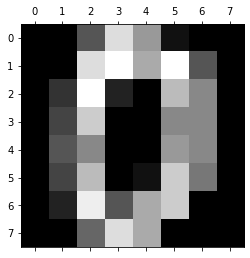

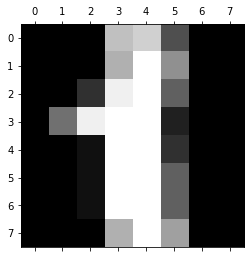

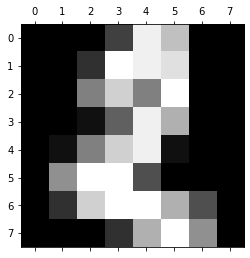

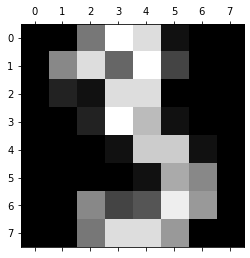

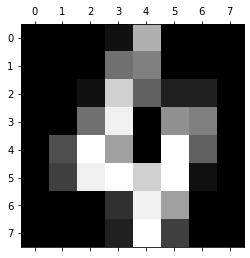

In [68]:
plt.gray()
for i in range(5):
  plt.matshow(digits.images[i])

In [69]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [80]:
# Use data and target to train the model

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

From the results above, we can conclude that:
1, 'satisfaction_level' is critical for employee retain (at point of 0.44)
2, likewise 'Average Monthly hour' 199 vs 207
3, 'promotion_last_5years' - if promoted, they likely stay


In [81]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [82]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
model.score(X_test, y_test)

0.9694444444444444

In [84]:
y_predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  1,  0,  0, 35,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  1,  0, 38,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 28,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 31,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 34]])

Text(69.0, 0.5, 'Truth')

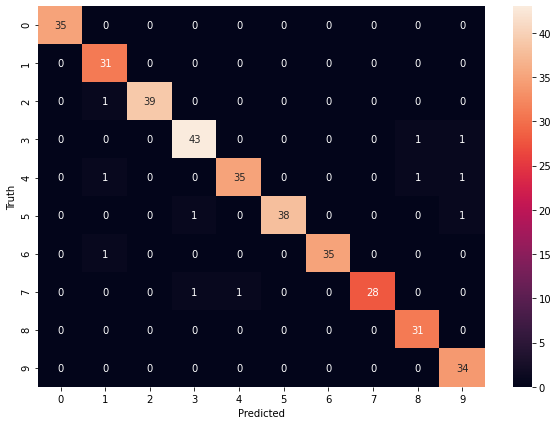

In [85]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')